In [1]:
import pandas as pd
from sklearn.dummy import DummyRegressor
import numpy as np
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
print(sklearn.__version__)

0.23.2


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [6]:
# Angela's code 
df.drop('id', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['waterfront'] = df['waterfront'].fillna('NO')
df['waterfront'] = df['waterfront'].str.replace('NO', '0')
df['waterfront'] = df['waterfront'].str.replace('YES', '1')
df['waterfront'] = pd.to_numeric(df['waterfront'])
df['view'] = df['view'].fillna('NONE')
df['grade'] = df['grade'].str.replace('7 Average', '7')
df['grade'] = df['grade'].str.replace('8 Good', '8')
df['grade'] = df['grade'].str.replace('9 Better', '9')
df['grade'] = df['grade'].str.replace('6 Low Average', '6')
df['grade'] = df['grade'].str.replace('10 Very Good', '10')
df['grade'] = df['grade'].str.replace('11 Excellent', '11')
df['grade'] = df['grade'].str.replace('5 Fair', '5')
df['grade'] = df['grade'].str.replace('12 Luxury', '12')
df['grade'] = df['grade'].str.replace('4 Low', '4')
df['grade'] = df['grade'].str.replace('13 Mansion', '13')
df['grade'] = df['grade'].str.replace('3 Poor', '3')
df['grade'] = pd.to_numeric(df['grade'])
if [df[df['sqft_basement'] == '?']]:
    df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                object
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [9]:
# drop the 'sqft_living15' and 'sqft_lot15' columns because they seem irrelevant for our purposes
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [11]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7,1180,0,1955,0.0,98178,47.5112,-122.257
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7,2170,400,1951,1991.0,98125,47.7210,-122.319
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6,770,0,1933,0.0,98028,47.7379,-122.233
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7,1050,910,1965,0.0,98136,47.5208,-122.393
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8,1680,0,1987,0.0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,8,1530,0,2009,0.0,98103,47.6993,-122.346
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,8,2310,0,2014,0.0,98146,47.5107,-122.362
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,7,1020,0,2009,0.0,98144,47.5944,-122.299
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8,1600,0,2004,0.0,98027,47.5345,-122.069


In [12]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [13]:
# encode the values of the "condition" column into a numeric form readable by inferential and predictive models
df["condition"].replace({"Poor": 1.0 , "Fair": 2.0, "Average": 3.0, "Good": 4.0, "Very Good": 5.0}, inplace=True)

In [14]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
# encode the values of the "view" column into a numeric form readable by inferential and predictive models
df["view"].replace({"NONE": 1.0 , "FAIR": 2.0, "AVERAGE": 3.0, "GOOD": 4.0, "EXCELLENT": 5.0}, inplace=True)

In [16]:
df['view'].value_counts()

1.0    19485
3.0      957
4.0      508
2.0      330
5.0      317
Name: view, dtype: int64

In [17]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                    float64
condition               float64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
dtype: object

In [18]:
y = df["price"]
X = df.drop("price", axis=1)

In [19]:
# drop columns that we believe are irrelevant for our purposes
drop_columns = ['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long']

In [20]:
df.drop(columns = drop_columns,axis = 1, inplace = True)

In [21]:
df_new = df

In [22]:
df_new.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [23]:
# prepare the input variables for the OLS model
outcome = 'price'
x_cols = ['sqft_living']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors


In [24]:
# run the OLS model with only one independent variable
model_ols = ols(formula=formula, data=df_new).fit()

In [25]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:17:16   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

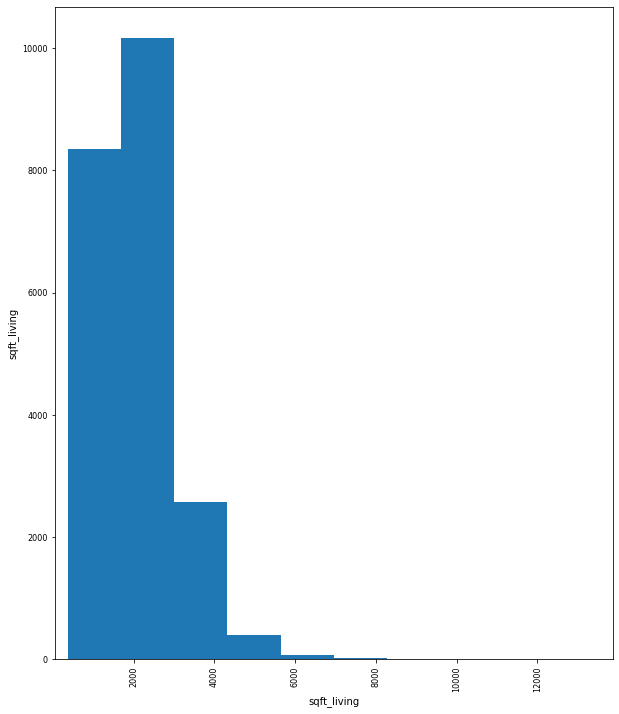

In [26]:
pd.plotting.scatter_matrix(df_new[x_cols], figsize=(10,12));

In [27]:
# logarithmic transformation of the 'price' variable to make it's distribution more normalized
df_new['price'] = df_new['price'].map(lambda x: np.log(x))

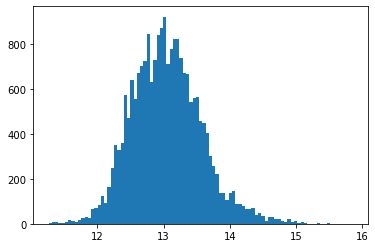

In [28]:
plt.hist(df_new['price'], bins = 'auto')
plt.show()

In [29]:
outcome_norm = 'price'
x_cols_norm = ['sqft_living']
predictors_norm = '+'.join(x_cols)
formula_norm = outcome_norm + '~' + predictors_norm

In [30]:
# run the OLS model with only one independent feature, but the target feature
# is log-transformed this time
model_ols_norm = ols(formula=formula_norm, data=df_new).fit()

In [31]:
model_ols_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:17:16   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2188      0.006   1915.383      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.118      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.541   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.562
Skew:                           0.028   Prob(JB):                        0.169
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

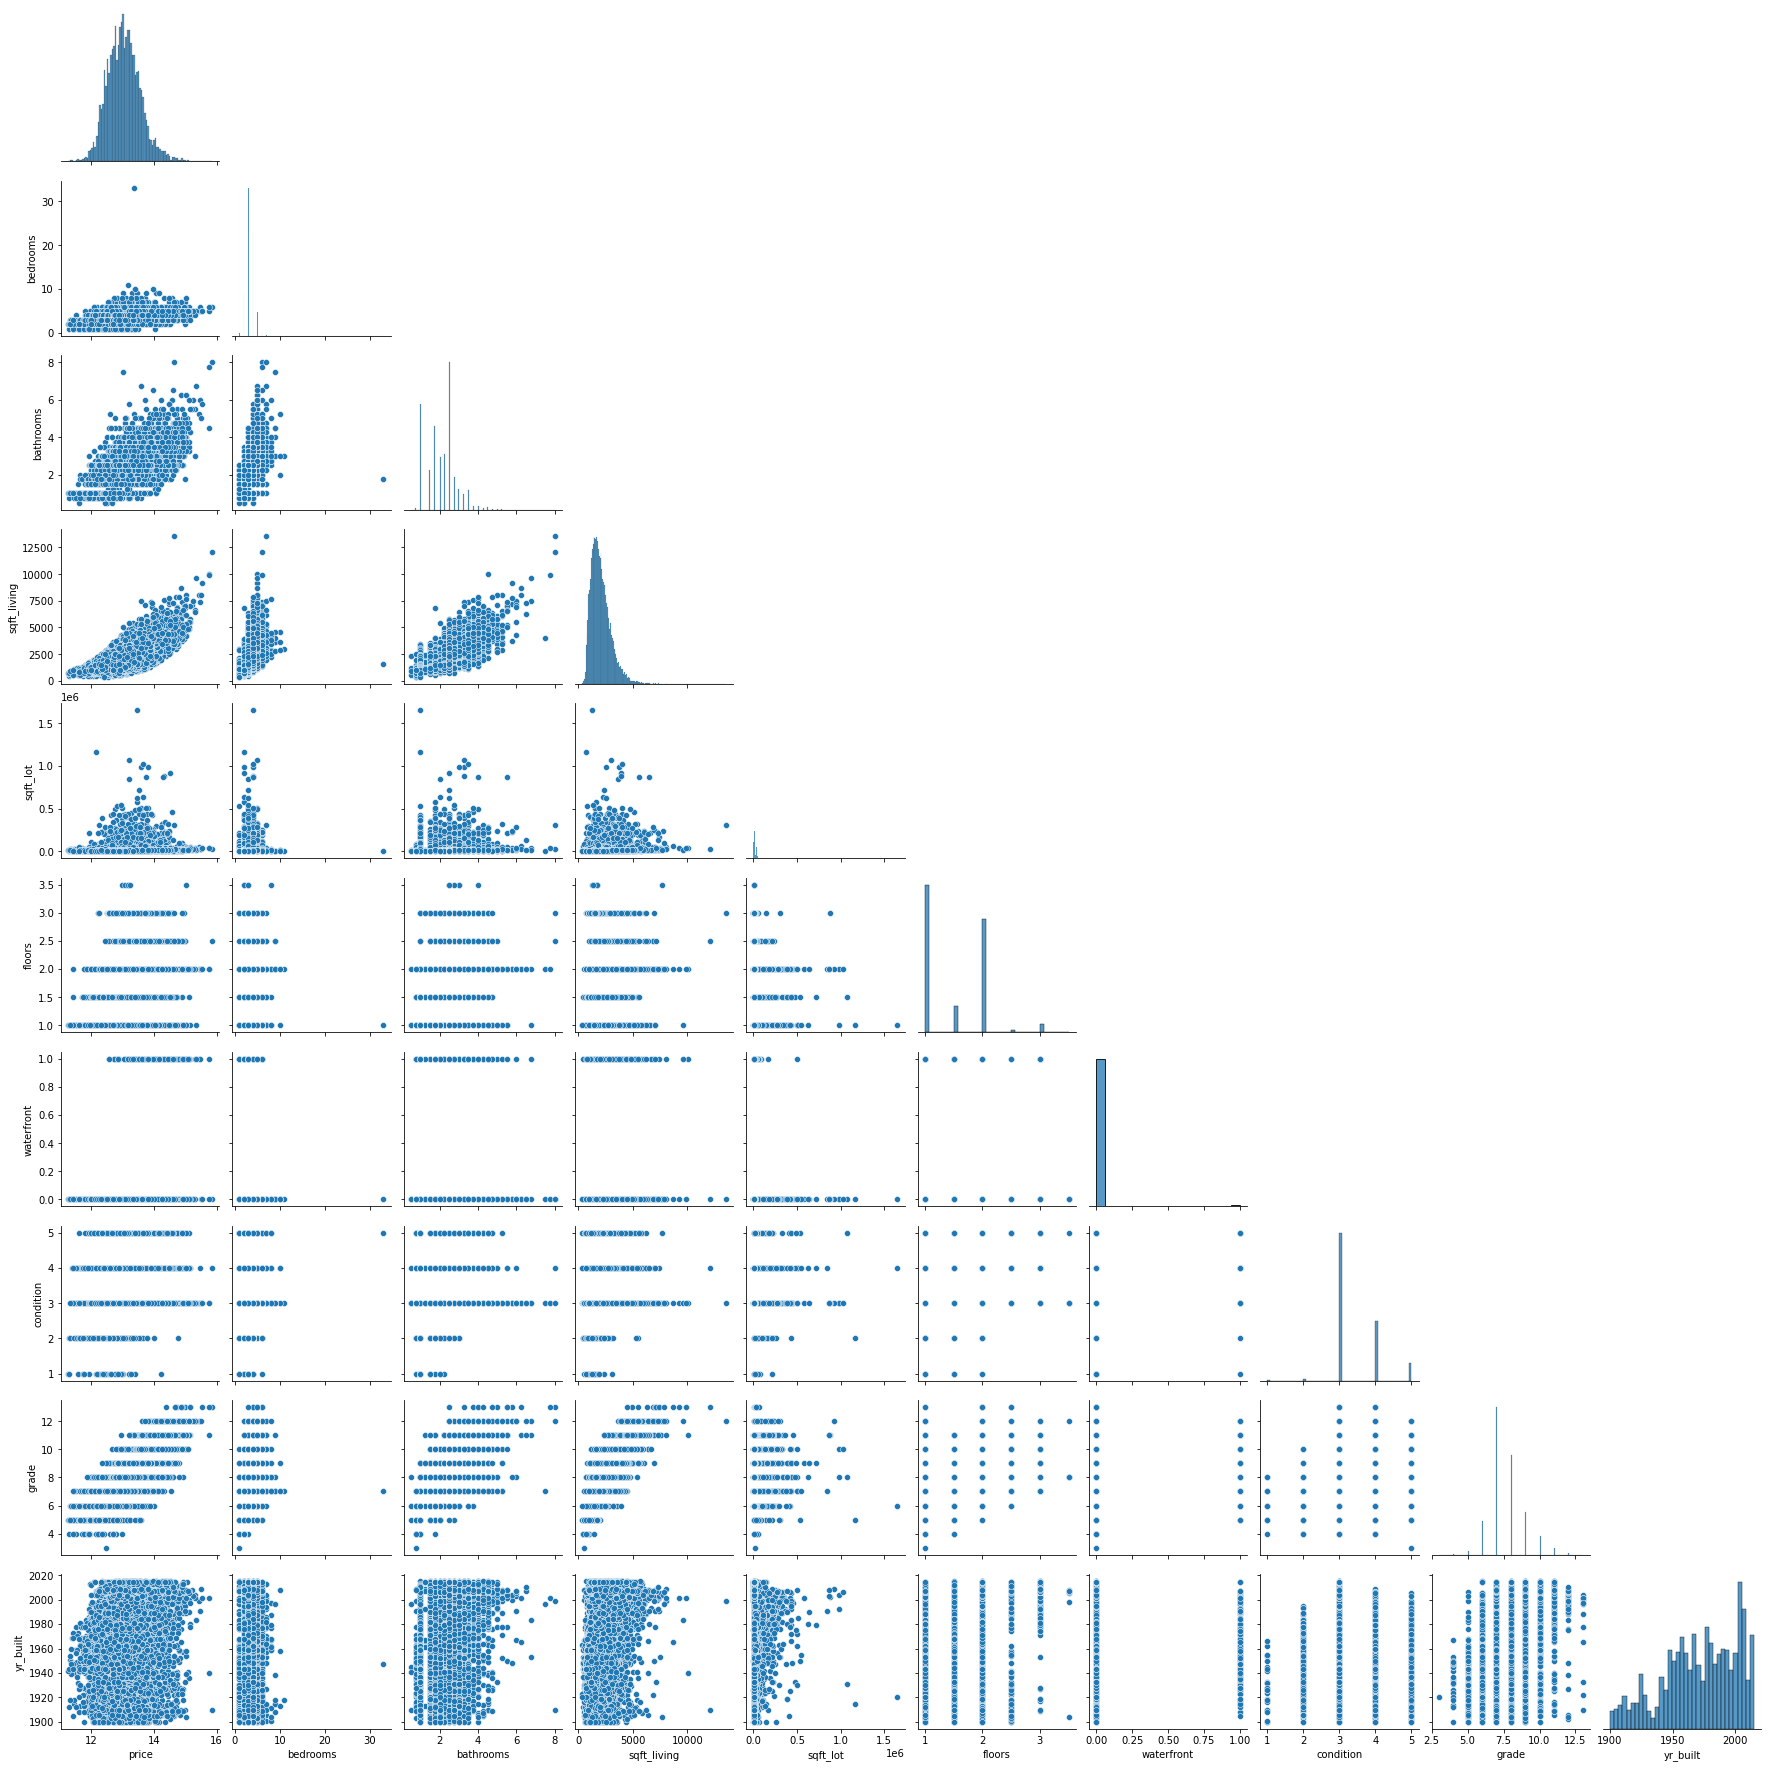

In [32]:
sns.pairplot(df_new, corner=True);

In [33]:
X = df_new.drop("price", axis = 1)
y = df_new['price']

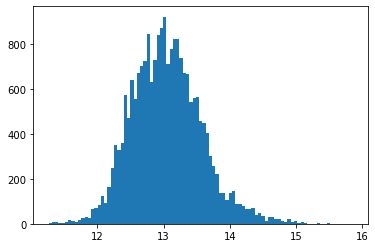

In [34]:
plt.hist(df['price'], bins = 'auto')
plt.show()

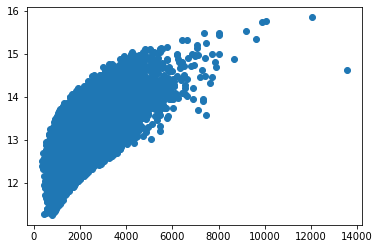

In [35]:
plt.scatter(df['sqft_living'],df['price'])

In [36]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaler.fit(df_new)
df_standard = scaler.transform(df_new)

In [39]:
df_standard

array([[-1.40203049, -0.40290302, -1.45107268, ..., -0.62998644,
        -0.56080027, -0.54467809],
       [ 0.27994485, -0.40290302,  0.17448579, ..., -0.62998644,
        -0.56080027, -0.68085037],
       [-1.79947215, -1.48249316, -1.45107268, ..., -0.62998644,
        -1.41318983, -1.29362563],
       ...,
       [-0.27301182, -1.48249316, -1.77618438, ..., -0.62998644,
        -0.56080027,  1.29364769],
       [-0.28296116, -0.40290302,  0.49959749, ..., -0.62998644,
         0.2915893 ,  1.12343234],
       [-0.67730599, -1.48249316, -1.77618438, ..., -0.62998644,
        -0.56080027,  1.25960462]])

In [40]:
df_standard_y = df_standard[:,0]

df_standard_x = np.delete(df_standard,0,1)

In [41]:
df_standard_x[0]

array([-0.40290302, -1.45107268, -0.98065209, -0.22818222, -0.91555234,
       -0.08249975, -0.62998644, -0.56080027, -0.54467809])

In [42]:
df_standard_x_df = pd.DataFrame(df_standard_x, columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'])

In [43]:
df_standard_y_df = pd.DataFrame(df_standard_y, columns = ['price'])

In [44]:
concatenated_standard_dataframes = pd.concat([df_standard_y_df, df_standard_x_df], axis=1)

In [45]:
concatenated_standard_dataframes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,-1.402030,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.0825,-0.629986,-0.560800,-0.544678
1,0.279945,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.0825,-0.629986,-0.560800,-0.680850
2,-1.799472,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.0825,-0.629986,-1.413190,-1.293626
3,0.499710,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.0825,2.444427,-0.560800,-0.204247
4,0.178438,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.0825,-0.629986,0.291589,0.544700
...,...,...,...,...,...,...,...,...,...,...
21592,-0.483060,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.0825,-0.629986,0.291589,1.293648
21593,-0.282961,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.0825,-0.629986,0.291589,1.463863
21594,-0.273012,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.0825,-0.629986,-0.560800,1.293648
21595,-0.282961,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.0825,-0.629986,0.291589,1.123432


In [46]:
df_standard_x

array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.62998644,
        -0.56080027, -0.54467809],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.62998644,
        -0.56080027, -0.68085037],
       [-1.48249316, -1.45107268, -1.4272339 , ..., -0.62998644,
        -1.41318983, -1.29362563],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ..., -0.62998644,
        -0.56080027,  1.29364769],
       [-0.40290302,  0.49959749, -0.52317805, ..., -0.62998644,
         0.2915893 ,  1.12343234],
       [-1.48249316, -1.77618438, -1.15492792, ..., -0.62998644,
        -0.56080027,  1.25960462]])

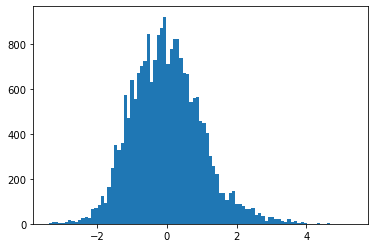

In [47]:
plt.hist(df_standard[:,0], bins = 'auto')
plt.show()

In [48]:
df_new.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.343360,0.551249,0.695185,0.100025,0.310630,0.170720,0.038918,0.703720,0.080583
bedrooms,0.343360,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.551249,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.695185,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.100025,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.310630,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.170720,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.038918,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.703720,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.080583,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [49]:
# run stepwise selection to see which features are recommended to include in the 
# prediction model
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
   
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [50]:
result = stepwise_selection(X,y, verbose=True)
print('resulting features:')
print(result)

<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 6.99018e-264
Add  waterfront                     with p-value 2.70228e-84
Add  floors                         with p-value 1.41849e-49


<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  condition                      with p-value 4.43583e-31
Add  bedrooms                       with p-value 4.52716e-19
resulting features:
['bathrooms', 'grade', 'yr_built', 'sqft_living', 'waterfront', 'floors', 'condition', 'bedrooms']


<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-49-d133d1404053>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [51]:
outcome_norm = 'price'
x_cols_norm = ['grade', 'yr_built', 'sqft_living', 'bathrooms', 'waterfront', 'floors', 'condition', 'bedrooms']
predictors_norm = '+'.join(x_cols_norm)
formula_norm = outcome_norm + '~' + predictors_norm

In [52]:
# run the inferential model

model = ols(formula = formula_norm, data = df_new).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4809.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:17:28   Log-Likelihood:                -5743.2
No. Observations:               21597   AIC:                         1.150e+04
Df Residuals:                   21588   BIC:                         1.158e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.9468      0.187    117.231      0.000      21.580      22.314
grade           0.2294      0.003     73.712      0.000       0.223       0.235
yr_built       -0.0058   9.62e-05    -60.023      0.000      -0.006      -0.006
sqft_living     0.0002   4.71e-06     36.802      0.000       0.000       0.000
bathrooms       0.0895      0.005     17.949      0.000       0.080       0.099
waterfront      0.5006      0.027     18.885      0.000       0.449       0.553
floors          0.0801      0.005     16.059      0.000       0.070       0.090
condition       0.0433      0.004     12.061      0.000       0.036       0.050
bedrooms       -0.0264      0.003     -8.932      0.000      -0.032      -0.021
==============================================================================
Omnibus:                       97.425   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.020
Skew:                          -0.104   Prob(JB):                     1.06e-25
Kurtosis:                       3.291   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
outcome_norm = 'price'
x_cols_norm = ['yr_built', 'sqft_living', 'waterfront', 'floors', 'condition', 'bedrooms']
predictors_norm = '+'.join(x_cols_norm)
formula_norm = outcome_norm + '~' + predictors_norm

In [55]:
# run the inferential model with 'grade' and 'bathrooms' dropped
model = ols(formula = formula_norm, data = df_new).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4250.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:17:28   Log-Likelihood:                -8370.6
No. Observations:               21597   AIC:                         1.676e+04
Df Residuals:                   21590   BIC:                         1.681e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.2150      0.199     96.519      0.000      18.825      19.605
yr_built       -0.0037      0.000    -36.813      0.000      -0.004      -0.004
sqft_living     0.0004   3.49e-06    122.075      0.000       0.000       0.000
waterfront      0.5339      0.030     17.841      0.000       0.475       0.593
floors          0.1730      0.005     32.309      0.000       0.162       0.183
condition       0.0454      0.004     11.211      0.000       0.037       0.053
bedrooms       -0.0495      0.003    -15.313      0.000      -0.056      -0.043
==============================================================================
Omnibus:                      162.533   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.998
Skew:                          -0.128   Prob(JB):                     1.12e-45
Kurtosis:                       3.406   Cond. No.                     2.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X['sqft_living_log'] = X['sqft_living'].map(lambda x: np.log(x))

In [58]:
# Run Recursive Feature Elimination
# to see which features are recommended for including 
# in the predictive model


linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X,y)

In [59]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,sqft_living_log
0,3,1.00,1180,5650,1.0,0,3.0,7,1955,7.073270
1,3,2.25,2570,7242,2.0,0,3.0,7,1951,7.851661
2,2,1.00,770,10000,1.0,0,3.0,6,1933,6.646391
3,4,3.00,1960,5000,1.0,0,5.0,7,1965,7.580700
4,3,2.00,1680,8080,1.0,0,3.0,8,1987,7.426549
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,3.0,8,2009,7.333023
21593,4,2.50,2310,5813,2.0,0,3.0,8,2014,7.745003
21594,2,0.75,1020,1350,2.0,0,3.0,7,2009,6.927558
21595,3,2.50,1600,2388,2.0,0,3.0,8,2004,7.377759


In [60]:
selector.support_ 

array([False, False, False, False, False,  True, False,  True, False,
        True])

In [61]:
selector.ranking_

array([3, 5, 7, 8, 4, 1, 2, 1, 6, 1])

In [62]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[0.68986685 0.20013223 0.41584622]
8.37101308304409


In [63]:
X1 = X.drop(columns = ['grade','bathrooms'], axis = 1)

In [64]:
# Run Recursive Feature Elimination again, this time with 'grade' and 'bathrooms' dropped
# to see which features are recommended for including 
# in the predictive model
linreg1 = LinearRegression()
selector1 = RFE(linreg, n_features_to_select=3)
selector1 = selector.fit(X1,y)

In [65]:
X1

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,sqft_living_log
0,3,1180,5650,1.0,0,3.0,1955,7.073270
1,3,2570,7242,2.0,0,3.0,1951,7.851661
2,2,770,10000,1.0,0,3.0,1933,6.646391
3,4,1960,5000,1.0,0,5.0,1965,7.580700
4,3,1680,8080,1.0,0,3.0,1987,7.426549
...,...,...,...,...,...,...,...,...
21592,3,1530,1131,3.0,0,3.0,2009,7.333023
21593,4,2310,5813,2.0,0,3.0,2014,7.745003
21594,2,1020,1350,2.0,0,3.0,2009,6.927558
21595,3,1600,2388,2.0,0,3.0,2004,7.377759


In [66]:
selector1.support_ 

array([False, False, False,  True,  True, False, False,  True])

In [67]:
selector1.ranking_

array([3, 5, 6, 1, 1, 2, 4, 1])

In [68]:
# Train- Test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
# Baseline model
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)

0.0

In [70]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'sqft_living_log'],
      dtype='object')

In [71]:
# run the Linear Regression model with ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#  'waterfront', 'condition', 'grade', 'yr_built', 'sqft_living_log'] as the independent
# variables
model2 = LinearRegression()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.6516054485958471
0.6265536672506233
